Project Title: Predicting Student Exam Performance Using Machine Learning

Objective: This project aims to predict students' exam scores based on various academic, behavioral, and socio-economic factors using a Linear Regression model. The analysis identifies key factors influencing performance and provides actionable insights to improve student outcomes.


Key Highlights:

1) Dataset and Features:

> The dataset includes features like Parental Involvement, Access to Resources, Hours Studied, Attendance, and Previous Scores.

> Target variable: Exam_Score (student performance).

2) Methodology:

> Data Preprocessing: 
    Categorical variables were encoded using One-Hot Encoding.
    Numerical variables were scaled using Standard Scaling.

> Model Development:
    A Linear Regression model was trained on 80% of the data and tested on the remaining 20%.

> Evaluation:
    Model performance was evaluated using metrics like Root Mean Squared Error (RMSE).
    Key visualizations, including feature importance and actual vs. predicted scores, were generated for interpretability.

3) Findings and Insights:

> Feature Importance: 
    Factors such as Hours Studied, Previous Scores, and Attendance have the highest influence on exam scores.

> Regression Equation:
    The model's equation highlights the contribution of each factor, allowing educators to focus on areas with the greatest impact.

> Model Accuracy:
    The Root Mean Square Error value reflects good model accuracy, demonstrating its ability to predict exam scores reliably.

4) Visualization and Interpretation:
> Feature Importance Plot: 
    Reveals the most impactful features.

> Residual Plot: 
    Confirms that residuals are distributed randomly around zero, indicating a well-fitted model.

> Correlation Heatmap: 
    Provides insights into relationships between features.

> Scatter Plot (Hours Studied vs. Exam Score): 
    Demonstrates the direct positive correlation between study hours and performance.

> Predictive Tool:
    A custom prediction function allows educators to input student-specific data (hours studied, attendance, etc.) and receive a predicted exam score, aiding personalized interventions.

Applications:

    Educational Strategy: Educators can leverage insights from the model to prioritize resource allocation and intervention programs.

    Student Support: Personalized learning plans can be developed by identifying students at risk of underperformance.

1. Data Loading

The dataset is loaded using pandas. Ensure the dataset file is in the correct directory.
Any rows with missing values are removed using dropna() for cleaner analysis.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Ensure there are no missing values in the dataset
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

2. Feature Selection

Features (independent variables) are stored in X, and the target (dependent variable) is stored in y.
Categorical and numerical features are identified separately for preprocessing.

In [2]:
# Splitting features and target also known as indepedent and dependent variables
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Identify categorical and numerical features
categorical_features = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", 
                        "Motivation_Level", "Internet_Access"]
numerical_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"]

3. Preprocessing

A ColumnTransformer is used to handle preprocessing:

> StandardScaler: Scales numerical features to have zero mean and unit variance.
> OneHotEncoder: Converts categorical features into binary variables (one-hot encoding).

The transformed dataset X_preprocessed is ready for machine learning.

In [3]:

# Preprocessing: Scaling numerical features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="drop"  # Drop any columns not explicitly specified
)

# Transform the data
X_preprocessed = preprocessor.fit_transform(X)

4. Splitting the Data

The dataset is split into training (80%) and testing (20%) sets.
random_state=42 ensures consistent results by fixing the random seed.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


5. Model Training

A Linear Regression model is initialized and trained on the X_train and y_train.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

6. Extracting the Regression Equation

The model's coefficients and intercept are extracted.
A regression equation is constructed to show how each feature contributes to the target variable.


In [6]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = preprocessor.get_feature_names_out()
equation = f"Exam_Score = {intercept:.2f} + " + " + ".join(
    [f"{coeff:.2f} * {name}" for coeff, name in zip(coefficients, feature_names)]
)
print("Regression Equation:")
print(equation)


Regression Equation:
Exam_Score = 68.59 + 1.77 * num__Hours_Studied + 2.31 * num__Attendance + -0.03 * num__Sleep_Hours + 0.67 * num__Previous_Scores + -2.03 * cat__Parental_Involvement_Low + -1.02 * cat__Parental_Involvement_Medium + -2.01 * cat__Access_to_Resources_Low + -0.94 * cat__Access_to_Resources_Medium + 0.57 * cat__Extracurricular_Activities_Yes + -1.14 * cat__Motivation_Level_Low + -0.65 * cat__Motivation_Level_Medium + 0.86 * cat__Internet_Access_Yes


7. Saving the Model

The preprocessor and trained model are saved as .pkl files for future use.

In [7]:
import joblib
import pandas as pd

# Save the preprocessor and model
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(model, "regression_model.pkl")

['regression_model.pkl']

Loading the preprocessor and model


In [8]:
# Load the preprocessor and model
preprocessor = joblib.load("preprocessor.pkl")
model = joblib.load("regression_model.pkl")


def clean_feature_names(feature_names):
    """
    Clean feature names by removing 'num__' and 'cat__' prefixes.
    :param feature_names: List of feature names with prefixes.
    :return: List of cleaned feature names.
    """
    return [name.replace("num__", "").replace("cat__", "") for name in feature_names]

8. Making Predictions

A function accepts input data as a dictionary.
The input is preprocessed and fed into the model to predict the exam score.

In [9]:
def predict_exam_score(input_data):
    """
    Predict Exam_Score based on input features.
    :param input_data: Dictionary containing input features and values.
    :return: Predicted Exam_Score.
    """
    # Convert input data to a DataFrame for processing
    input_df = pd.DataFrame([input_data])
    
    # Transform input data using the preprocessor
    input_transformed = preprocessor.transform(input_df)
    
    # Predict using the trained model
    predicted_score = model.predict(input_transformed)
    
    return predicted_score[0]

In [10]:
# Example for retrieving and cleaning feature names for the regression equation
feature_names = preprocessor.get_feature_names_out()
cleaned_feature_names = clean_feature_names(feature_names)

# Display the regression equation without prefixes
coefficients = model.coef_
intercept = model.intercept_
regression_equation = (
    f"Exam_Score = {intercept:.2f} + " + 
    " + ".join(
        [f"{coeff:.2f} * {name}" for coeff, name in zip(coefficients, cleaned_feature_names)]
    )
)

print("Regression Equation:")
print(regression_equation)

Regression Equation:
Exam_Score = 68.59 + 1.77 * Hours_Studied + 2.31 * Attendance + -0.03 * Sleep_Hours + 0.67 * Previous_Scores + -2.03 * Parental_Involvement_Low + -1.02 * Parental_Involvement_Medium + -2.01 * Access_to_Resources_Low + -0.94 * Access_to_Resources_Medium + 0.57 * Extracurricular_Activities_Yes + -1.14 * Motivation_Level_Low + -0.65 * Motivation_Level_Medium + 0.86 * Internet_Access_Yes


Example Input:

In [11]:
new_student = {
    "Hours_Studied": 25,
    "Attendance": 85,
    "Parental_Involvement": "Medium",
    "Access_to_Resources": "High",
    "Extracurricular_Activities": "Yes",
    "Sleep_Hours": 7,
    "Previous_Scores": 78,
    "Motivation_Level": "Medium",
    "Internet_Access": "Yes"
}
predicted_score = predict_exam_score(new_student)
print(f"Predicted Exam Score: {predicted_score:.2f}")


Predicted Exam Score: 70.97


9. Visualization

a. Feature Importance

Shows how important each feature is based on its regression coefficient.
Features with higher coefficients have a stronger impact on the target variable.

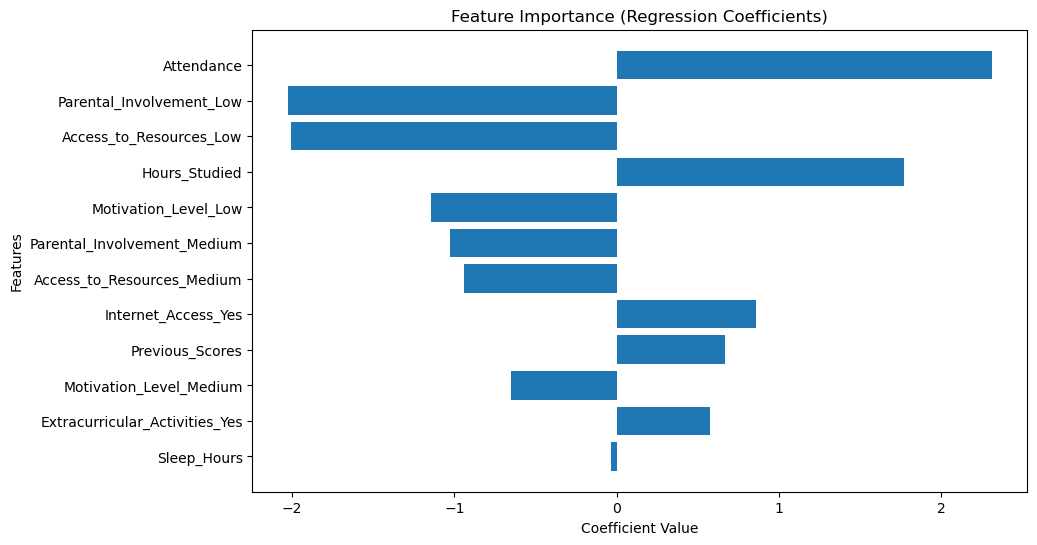

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients and feature names
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()

# Clean feature names by removing prefixes
cleaned_feature_names = [name.replace("num__", "").replace("cat__", "") for name in feature_names]

# Sort features by importance
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_features = np.array(cleaned_feature_names)[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.title("Feature Importance (Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


a. Feature Importance

Shows how important each feature is based on its regression coefficient.
Features with higher coefficients have a stronger impact on the target variable.

A tighter clustering around the red diagonal indicates better predictions.
Quantify model performance using RMSE.

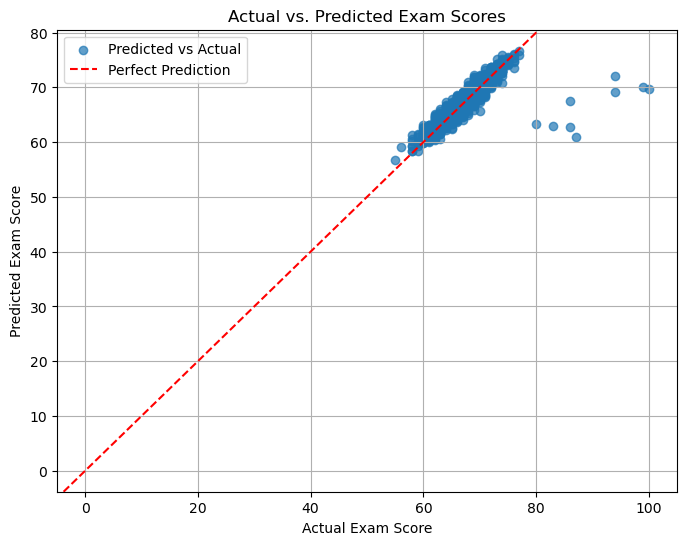

Root Mean Squared Error (RMSE): 2.30


In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted Exam Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.title("Actual vs. Predicted Exam Scores")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


b. Actual vs. Predicted

Compares the actual and predicted exam scores to assess the model’s accuracy.

Determine whether the model captures the distribution of actual scores accurately.

Visualize how well the model predicts Exam_Score by comparing actual values against predicted values.

/tmp/ipykernel_8341/253183096.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_array, label="Actual Exam Scores", shade=True, bw_adjust=1.0, color="blue")
/tmp/ipykernel_8341/253183096.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_array, label="Predicted Exam Scores", shade=True, bw_adjust=1.0, color="orange")


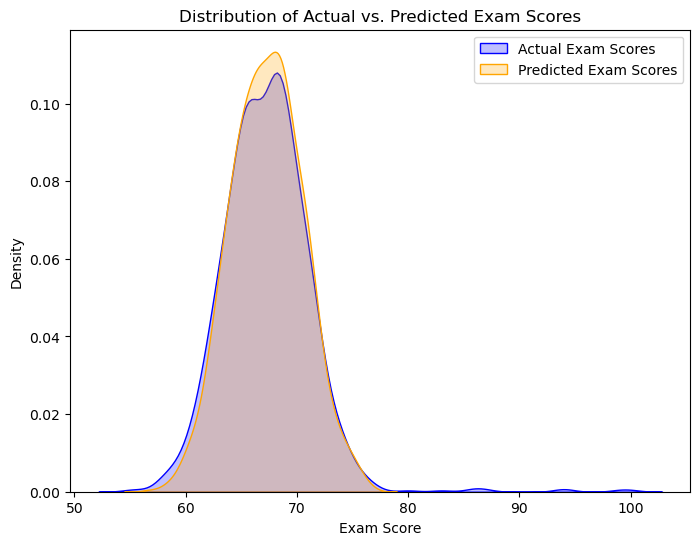

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_test and y_pred are numpy arrays for compatibility with seaborn
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Plot distributions using KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test_array, label="Actual Exam Scores", shade=True, bw_adjust=1.0, color="blue")
sns.kdeplot(y_pred_array, label="Predicted Exam Scores", shade=True, bw_adjust=1.0, color="orange")
plt.title("Distribution of Actual vs. Predicted Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Density")
plt.legend()
plt.show()


c. Feature Correlation Heatmap

Visualizes correlations between features and the target variable.

Identify strong correlations between features and Exam_Score.
Detect multicollinearity among features.

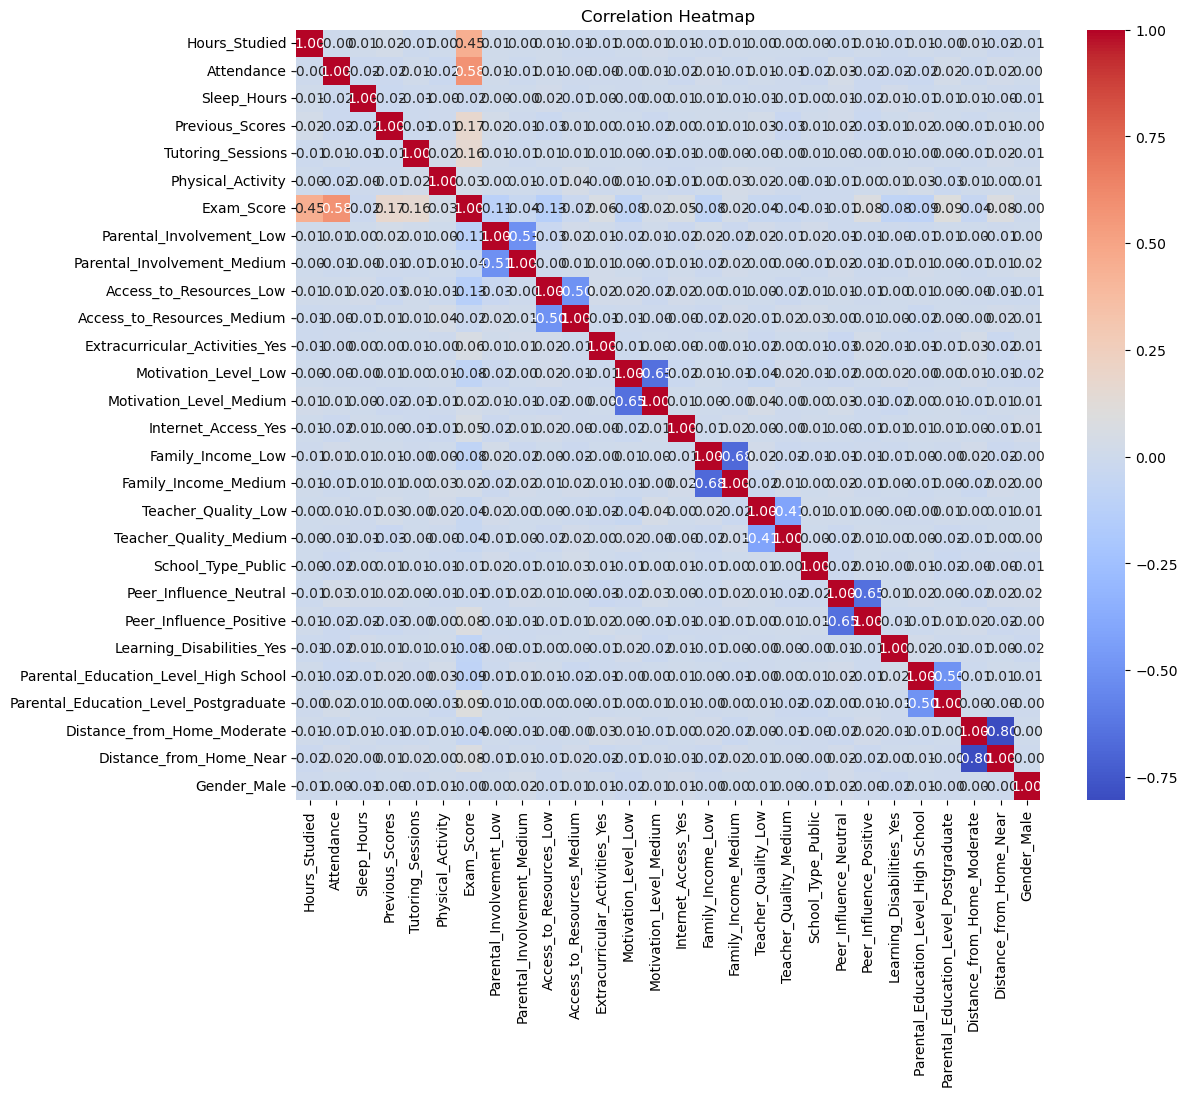

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


d. Residual Analysis

Residuals represent the difference between actual and predicted values.
A well-fitted model will have residuals centered around zero.

Residuals should be randomly distributed around zero.
Patterns in residuals indicate issues like underfitting or overfitting.



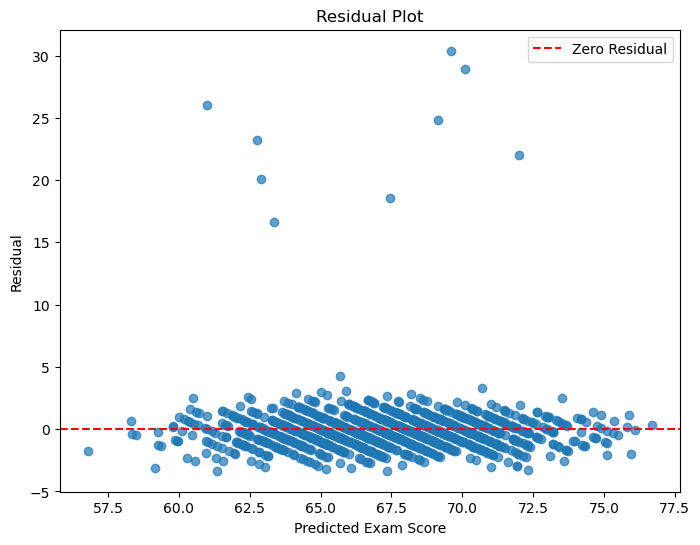

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residual Plot")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residual")
plt.legend()
plt.show()


e. Hours Studied vs. Exam Score

Demonstrates the relationship between hours studied and exam scores.Impact of a Single Feature.

Visualize trends (e.g., linear or nonlinear relationships) between a specific feature and the target.

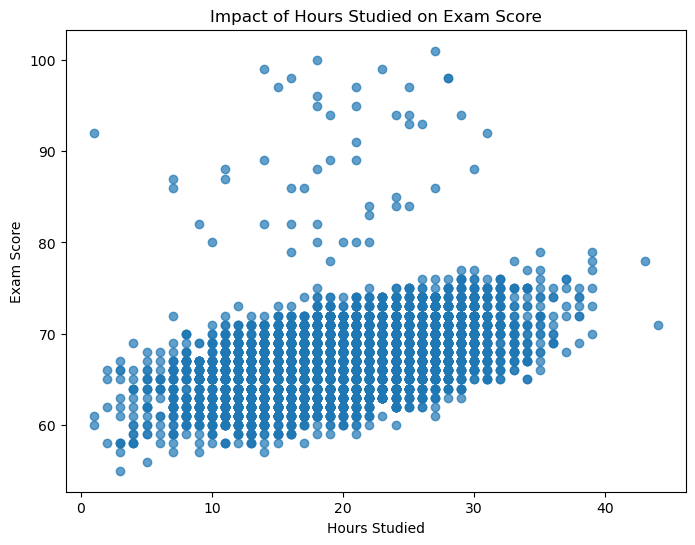

In [17]:
# Plot feature vs. target
plt.figure(figsize=(8, 6))
plt.scatter(df["Hours_Studied"], df["Exam_Score"], alpha=0.7)
plt.title("Impact of Hours Studied on Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


f. Pairplot of Features

To visually examine the relationships and distributions of the selected numerical features to identify patterns, correlations, and trends that may impact the target variable "Exam_Score".

The pairplot reveals positive relationships between features like Hours_Studied, Attendance, and Previous_Scores with Exam_Score, while also highlighting feature distributions and potential outliers.


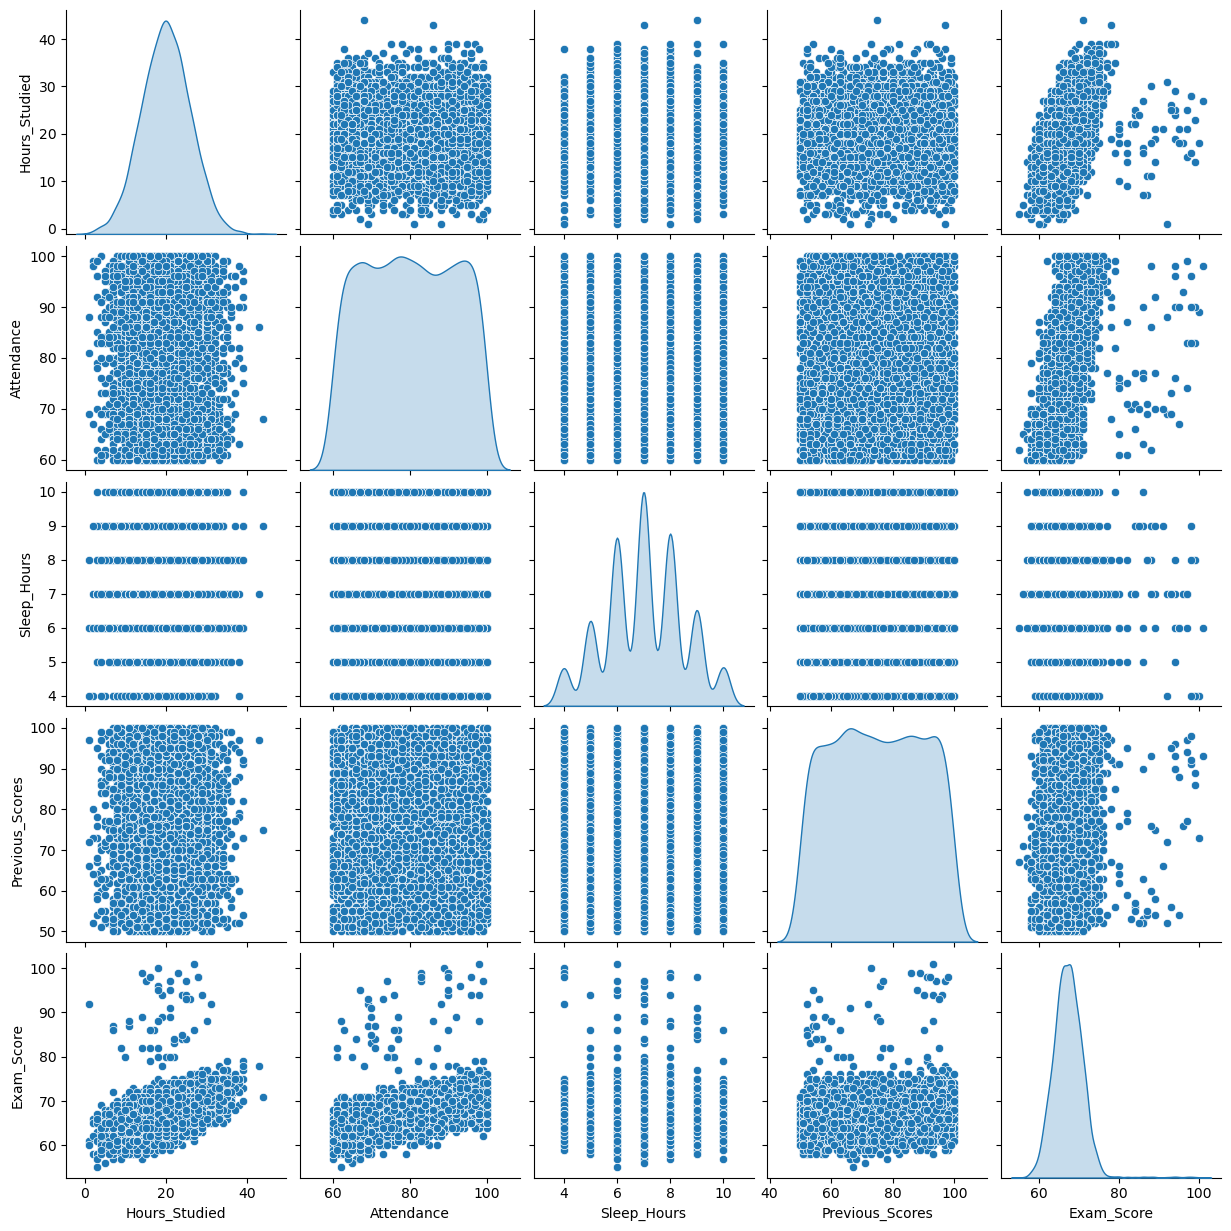

In [18]:
# Select key numerical features
key_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Exam_Score"]

# Pairplot
sns.pairplot(df[key_features], diag_kind="kde")
plt.show()


10. Model Evaluation

RMSE quantifies the difference between actual and predicted values. A lower RMSE indicates better performance.

In [19]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 2.30


Conclusion:

This project successfully demonstrates how machine learning can be applied to predict and analyze student exam performance. It provides valuable insights into the factors influencing academic success, supporting data driven decisions in education.


This project also demonstrates the process of building a regression model to predict student exam performance. 

It includes:

> Data preprocessing (handling categorical and numerical features).

> Training and evaluating a linear regression model.

> Extracting a regression equation.

> Generating meaningful visualizations to interpret model insights.

In [20]:
pip install streamlit pandas plotly pdfkit


Note: you may need to restart the kernel to use updated packages.


In [25]:
import streamlit as st
import pandas as pd
import plotly.express as px
import pdfkit

# Load Data
@st.cache_data
def load_data():
    # Example dataset
    data = {
        "Student": ["Alice", "Bob", "Charlie", "David"],
        "Hours_Studied": [5, 8, 3, 6],
        "Attendance": [90, 85, 78, 88],
        "Previous_Scores": [75, 82, 60, 70],
        "Exam_Score": [78, 88, 68, 75],
    }
    return pd.DataFrame(data)

df = load_data()

# Dashboard Layout
st.title("Interactive Dashboard: Predicting Student Performance")
st.write("Explore and analyze student performance data.")

# Filters
st.sidebar.header("Filters")
min_score = st.sidebar.slider("Minimum Exam Score", 0, 100, 60)
filtered_data = df[df["Exam_Score"] >= min_score]

# Visualizations
st.subheader("Filtered Data")
st.write(filtered_data)

# Scatter Plot: Hours Studied vs Exam Score
st.subheader("Hours Studied vs. Exam Score")
fig = px.scatter(filtered_data, x="Hours_Studied", y="Exam_Score", color="Student", size="Attendance")
st.plotly_chart(fig)

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
st.subheader("Correlation Heatmap")
fig_corr = px.imshow(corr, text_auto=True, color_continuous_scale="viridis", title="Correlation Heatmap")
st.plotly_chart(fig_corr)


# Generate Report
st.subheader("Generate Report")

def generate_html_report(filtered_data):
    html_content = f"""
    <html>
    <head>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 20px; }}
            table {{ width: 100%; border-collapse: collapse; }}
            th, td {{ border: 1px solid black; padding: 8px; text-align: left; }}
            th {{ background-color: #f2f2f2; }}
        </style>
    </head>
    <body>
        <h1>Student Performance Report</h1>
        <h2>Summary</h2>
        <p>Total Students: {len(filtered_data)}</p>
        <h2>Filtered Data</h2>
        {filtered_data.to_html(index=False)}
    </body>
    </html>
    """
    return html_content

if st.button("Generate Report"):
    html_report = generate_html_report(filtered_data)
    with open("report.html", "w") as f:
        f.write(html_report)

    pdfkit.from_file("report.html", "Student_Performance_Report.pdf")
    st.success("Report generated successfully!")
    with open("Student_Performance_Report.pdf", "rb") as f:
        st.download_button("Download Report", f, file_name="Student_Performance_Report.pdf")



2024-11-25 23:43:06.472 No runtime found, using MemoryCacheStorageManager


https://chatgpt.com/share/e/67424295-acfc-8008-9648-cb68e5fea176